In [34]:
import pandas as pd


In [35]:
apps_with_duplicates = pd.read_csv('E:\\github\DataScience-Projects\The Android App Market on Google Play\datasets\\apps.csv')

In [36]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('E:\\github\DataScience-Projects\The Android App Market on Google Play\datasets\\apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates(subset=['App'])

# Print the total number of apps
print('Total number of apps in the dataset = ',len(apps.App))

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1093,1327,Pocket Yoga,HEALTH_AND_FITNESS,4.4,2107,NaN,"100,000+",Paid,$2.99,Everyone,Health & Fitness,"December 22, 2015",Varies with device,Varies with device
4521,5485,AP Math & Computer Science,FAMILY,3.7,37,9.5,"5,000+",Free,0,Everyone,Education,"July 19, 2015",2.16,2.3 and up
8402,9528,Sanu Ek Pal Chain Song Videos - RAID Movie Songs,FAMILY,4.9,11,4.3,"5,000+",Free,0,Everyone,Entertainment,"March 8, 2018",1.2.8,4.0.3 and up
690,854,Toca Life: Hospital,EDUCATION,4.7,3528,24.0,"100,000+",Paid,$3.99,Everyone,Education;Pretend Play,"June 12, 2018",1.1.1-play,4.4 and up
2247,2870,InstaSize Photo Filters & Collage Editor,PHOTOGRAPHY,4.3,811693,50.0,"50,000,000+",Free,0,Everyone,Photography,"August 2, 2018",4.0.26,4.4 and up


In [37]:
# List of characters to remove
chars_to_remove = [',' ,'$' ,'+']
# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

In [38]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [39]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


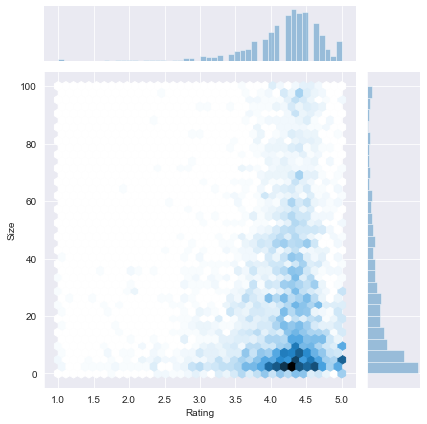

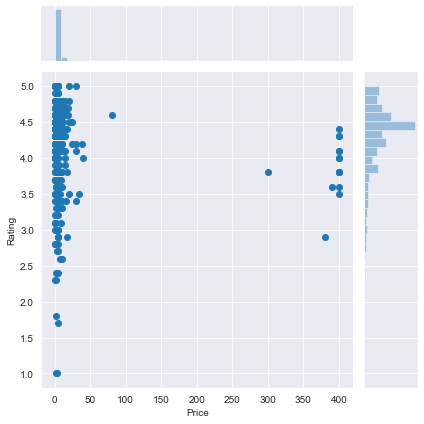

In [40]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Rating"], y = large_categories["Size"], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


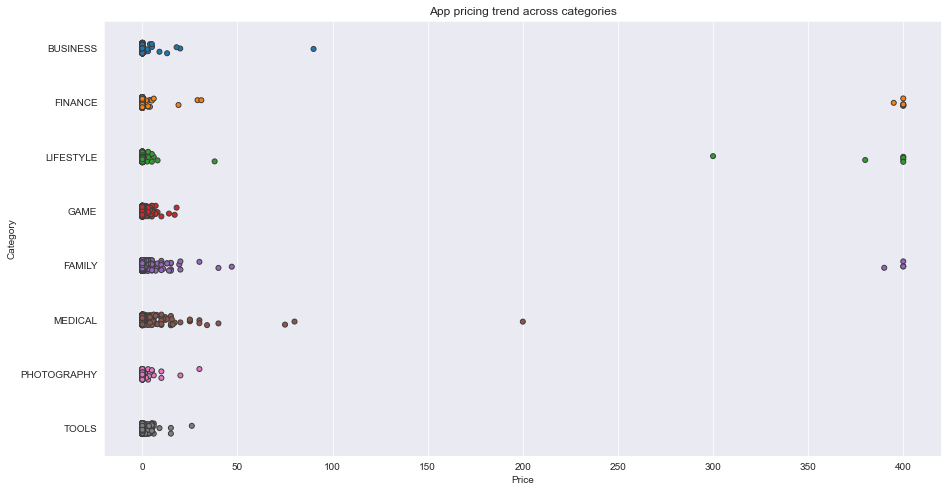

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

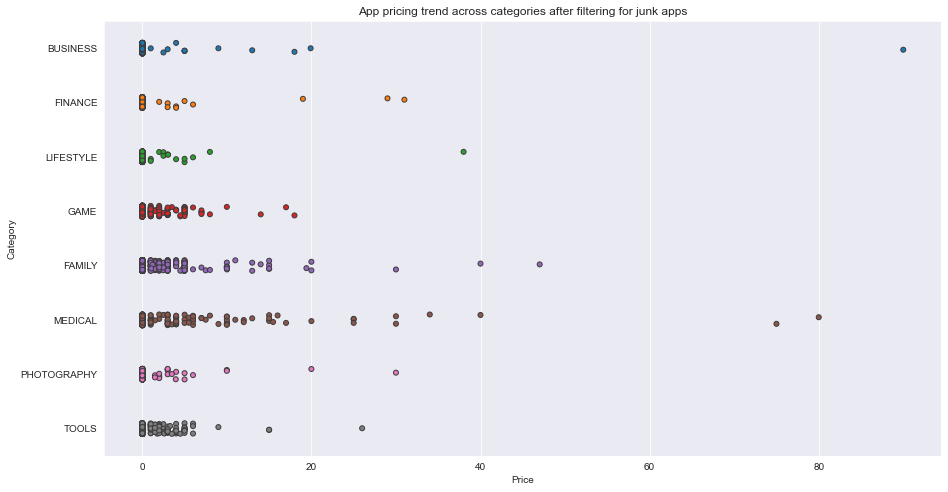

In [42]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [43]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

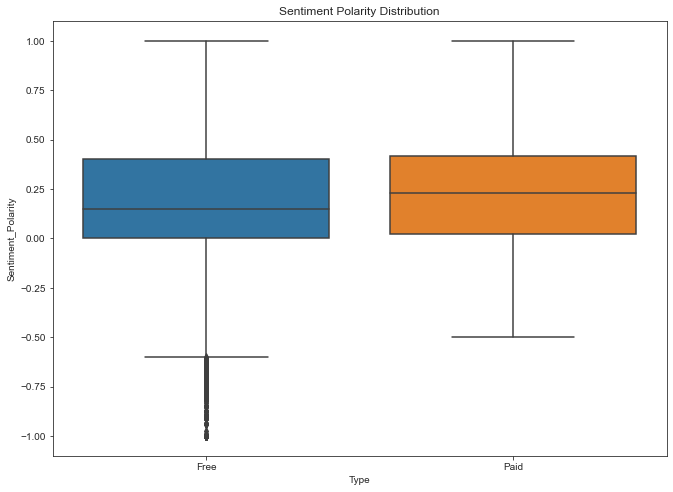

In [44]:
# Load user_reviews.csv
reviews_df = pd.read_csv(r'C:\\Users\HP\pandas practicle\Untitled Folder\\user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')